In [285]:
#import Libraries
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
plt.style.use('fivethirtyeight')
import datetime
import pandas as pd
import sqlalchemy as sa


In [286]:

#connection_string_Housing = "mssql+pyodbc:///?odbc_connect=DRIVER={ODBC Driver 18 for SQL Server};SERVER=KALLESPC;DATABASE=Housing;Encrypt=NO;Trusted_Connection=yes"
#connection_string_GDP_GROWTH = "mssql+pyodbc:///?odbc_connect=DRIVER={ODBC Driver 18 for SQL Server};SERVER=KALLESPC;DATABASE=GDP_GROWTH_1998_2024_STATE;Encrypt=NO;Trusted_Connection=yes"
#engine = sa.create_engine(connection_string_Housing)

import sqlalchemy as sa
import pandas as pd
import urllib

params_housing = urllib.parse.quote_plus(
    "DRIVER={ODBC Driver 18 for SQL Server};"
    "SERVER=localhost;"
    "DATABASE=Housing;"
    "UID=SA;"
    "PWD=SuperK_0606$;"
    "Encrypt=no;"
    "TrustServerCertificate=yes"
)


params_wages = urllib.parse.quote_plus(
    "DRIVER={ODBC Driver 18 for SQL Server};"
    "SERVER=localhost;"
    "DATABASE=Worker_pay;"
    "UID=SA;"
    "PWD=SuperK_0606$;"
    "Encrypt=no;"
    "TrustServerCertificate=yes"
)

connection_string_Housing = f"mssql+pyodbc:///?odbc_connect={params_housing}"
connection_string_wages = f"mssql+pyodbc:///?odbc_connect={params_wages}"

engine_housing = sa.create_engine(connection_string_Housing)
engine_wages = sa.create_engine(connection_string_wages)

# Read table into DataFrame
Housing_pricesindex_df = pd.read_sql('SELECT * from hpi_avg_monthly', engine_housing)
print(Housing_pricesindex_df.head())

hourly_earnings_df = pd.read_sql('SELECT * from avg_hourly_earnings_19702025',engine_wages)
print(hourly_earnings_df.head())

      column1     avg_hpi
0  1991-01-01  100.000000
1  1991-02-01  100.355000
2  1991-03-01  100.568999
3  1991-04-01  100.460500
4  1991-05-01  100.490500
       Series_ID  Year Period       Label  Value  _1_Month_Net_Change  \
0  CES0500000008  1970    M01  1970-01-01   3.31                 0.00   
1  CES0500000008  1970    M02  1970-02-01   3.33                 0.02   
2  CES0500000008  1970    M03  1970-03-01   3.36                 0.03   
3  CES0500000008  1970    M04  1970-04-01   3.36                 0.00   
4  CES0500000008  1970    M05  1970-05-01   3.37                 0.01   

   _1_Month_Change  
0              0.0  
1              0.6  
2              0.9  
3              0.0  
4              0.3  


/home/kalle/kdatascience/lib/python3.12/site-packages/pandas/io/sql.py:1648: SAWarning: Unrecognized server version info '17.0.800.3'.  Some SQL Server features may not function properly.
  con = self.exit_stack.enter_context(con.connect())
/home/kalle/kdatascience/lib/python3.12/site-packages/pandas/io/sql.py:1648: SAWarning: Unrecognized server version info '17.0.800.3'.  Some SQL Server features may not function properly.
  con = self.exit_stack.enter_context(con.connect())


In [287]:
#print(Housing_pricesindex_df.shape)
#Housing_pricesindex_df.sort_values(by = 'column1', inplace=True)

print(Housing_pricesindex_df.iloc[:, 1:2])
print(Housing_pricesindex_df.iloc[:, 0:1])

        avg_hpi
0    100.000000
1    100.355000
2    100.568999
3    100.460500
4    100.490500
..          ...
406  440.352501
407  440.936002
408  441.984000
409  443.901999
410  445.501003

[411 rows x 1 columns]
        column1
0    1991-01-01
1    1991-02-01
2    1991-03-01
3    1991-04-01
4    1991-05-01
..          ...
406  2024-11-01
407  2024-12-01
408  2025-01-01
409  2025-02-01
410  2025-03-01

[411 rows x 1 columns]


datetime64[ns]


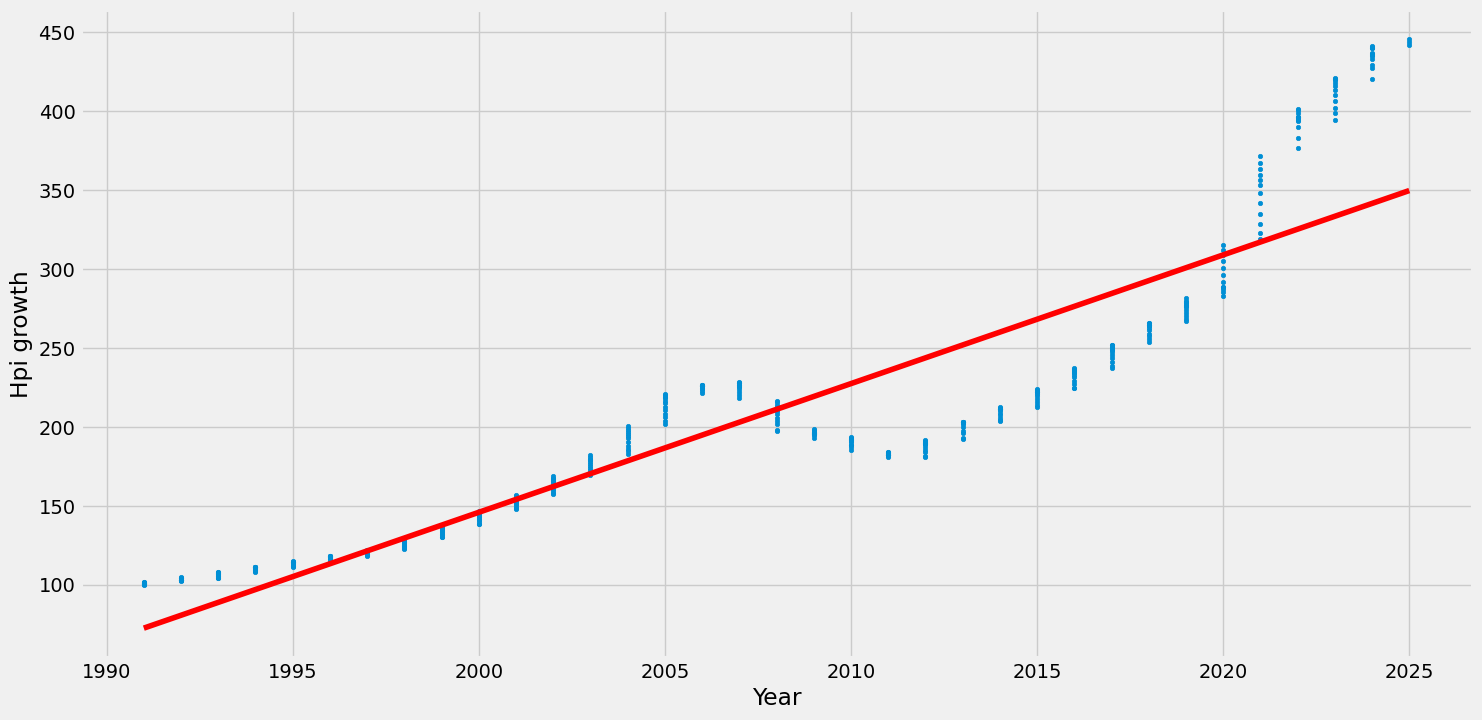

[[8.15128562]]


In [288]:
# Assign column 0 to a named column so we can work with it clearly
Housing_pricesindex_df['date_column'] = pd.to_datetime(Housing_pricesindex_df.iloc[:, 0], errors='coerce')

# Check if conversion worked
print(Housing_pricesindex_df['date_column'].dtypes)
# Should print: datetime64[ns]

# Drop rows where conversion failed 
Housing_pricesindex_df.dropna(subset=['date_column'], inplace=True)

# Extract year from datetime
x = Housing_pricesindex_df['date_column'].dt.year.values.reshape(-1, 1)

# Use second column as y
y = Housing_pricesindex_df.iloc[:, 1].values.reshape(-1, 1)

# Fit linear regression
LR = LinearRegression()
Reg = LR.fit(x, y)
y_pred = LR.predict(x)

# Plot
plt.figure(figsize=(16,8))
plt.plot(x, y_pred, color='red')
plt.scatter(x, y, s=10)
plt.xlabel("Year")
plt.ylabel("Hpi growth")
plt.show()

slp=Reg.coef_

print(slp)


housing prices increasing at an average rate of .0815% a month year .978% a year

[[0.44345648]]


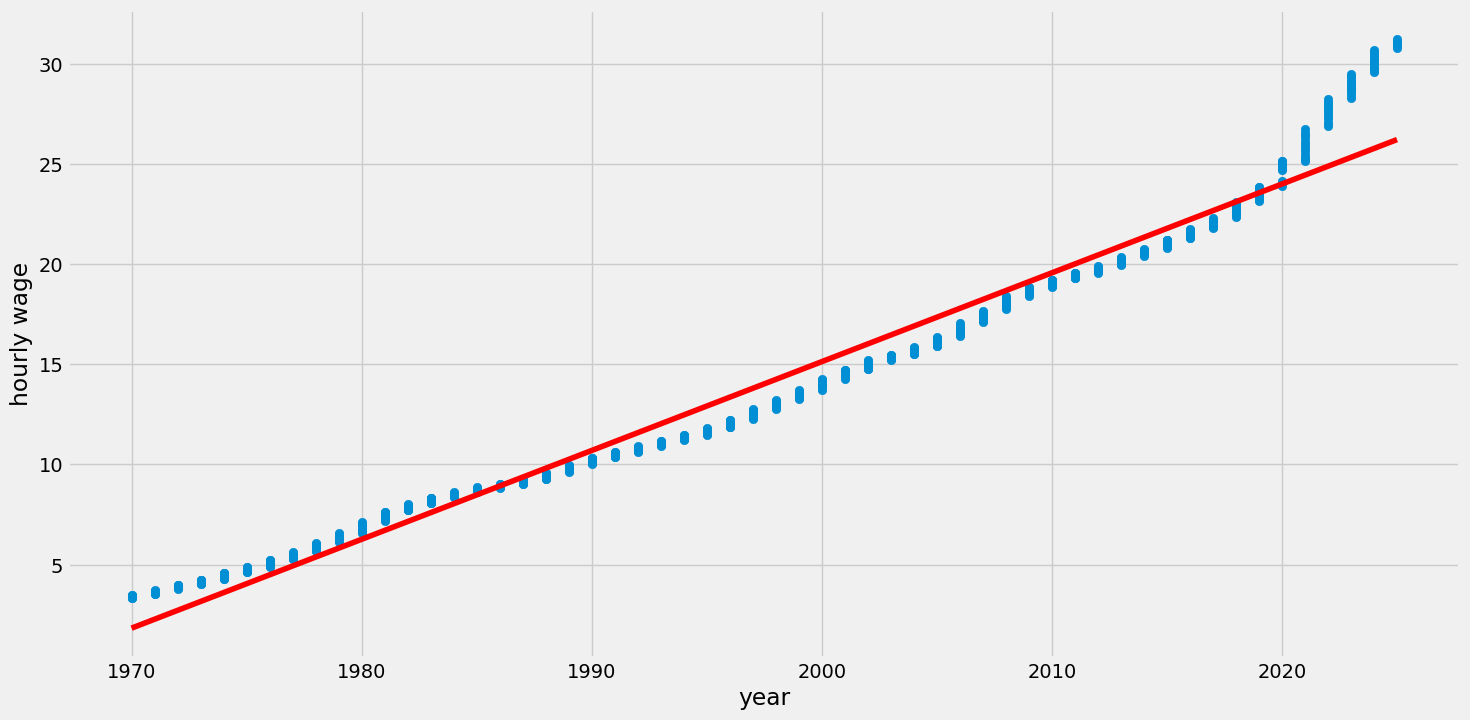

In [289]:
x = hourly_earnings_df.iloc[:, 1:2]
y = hourly_earnings_df.iloc[:, 4:5]
LR = LinearRegression()
plt.figure(figsize=(16,8))
Reg = LR.fit(x,y)
y_pred = LR.predict(x)
plt.plot(x,y_pred, color = "red")
plt.scatter(x,y)
plt.xlabel("year")
plt.ylabel("hourly wage")

slp=Reg.coef_

print(slp)

wages increasing at a rate of .33% a month which is 3.96% a year

  observation_date    MSPUS
0       1963-01-01  17800.0
1       1963-04-01  18000.0
2       1963-07-01  17900.0
3       1963-10-01  18500.0
4       1964-01-01  18500.0
datetime64[ns]


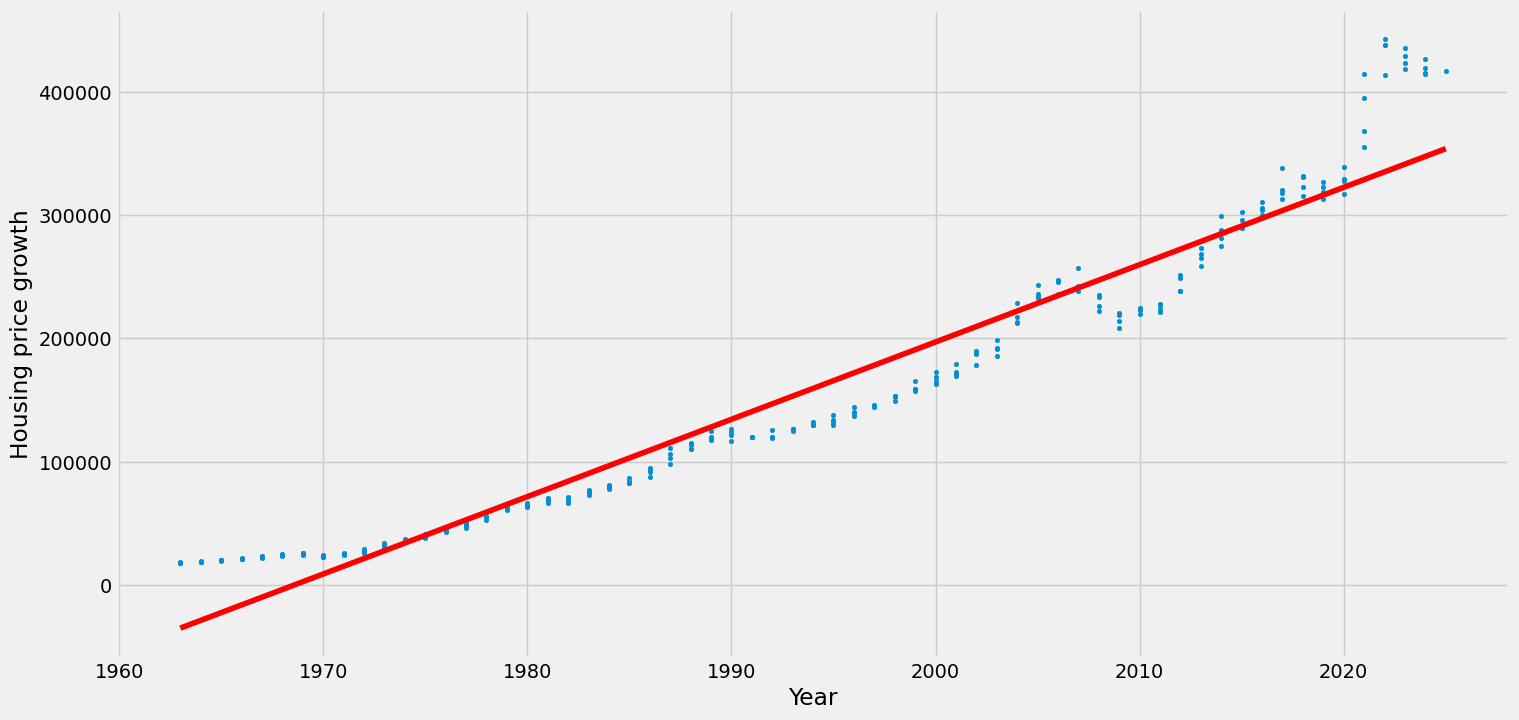

[[6266.42445998]]


In [295]:
import sqlalchemy as sa
import pandas as pd
import urllib

params_housingprices = urllib.parse.quote_plus(
    "DRIVER={ODBC Driver 18 for SQL Server};"
    "SERVER=localhost;"
    "DATABASE=Housing;"
    "UID=SA;"
    "PWD=SuperK_0606$;"
    "Encrypt=no;"
    "TrustServerCertificate=yes"
)


connection_string_Housing = f"mssql+pyodbc:///?odbc_connect={params_housingprices}"


engine_housingprices = sa.create_engine(connection_string_Housing)

Housing_prices_df = pd.read_sql('SELECT * from quarterly_housing_19632025', engine_housing)
print(Housing_prices_df.head())


# Assign column 0 to a named column so we can work with it clearly
Housing_prices_df['date_column'] = pd.to_datetime(Housing_prices_df.iloc[:, 0], errors='coerce')

# Check if conversion worked
print(Housing_prices_df['date_column'].dtypes)
# Should print: datetime64[ns]

# Drop rows where conversion failed 
Housing_prices_df.dropna(subset=['date_column'], inplace=True)

# Extract year from datetime
x = Housing_prices_df['date_column'].dt.year.values.reshape(-1, 1)

# Use second column as y
y = Housing_prices_df.iloc[:, 1].values.reshape(-1, 1)

# Fit linear regression
LR = LinearRegression()
Reg = LR.fit(x, y)
y_pred = LR.predict(x)

# Plot
plt.figure(figsize=(16,8))
plt.plot(x, y_pred, color='red')
plt.scatter(x, y, s=10)
plt.xlabel("Year")
plt.ylabel("Housing price growth")
plt.show()

slp=Reg.coef_

print(slp)



Average housing price in 2025 is 416900 average hourly wage is 31.24 the mortagage on that home would cost about 3000$ with the average wage the worker would be making 4998.4 before tax and about 4360.93 after tax which would leave the home owner 1360.93 for everything else after the mortagage